# The minimum jerk hypothesis

Marcos Duarte

Hogan and Flash (1984, 1985), based on observations of voluntary movements in primates, suggested that movements are performed (organized) with the smoothest trajectory possible. In this organizing principle, the endpoint trajectory is such that the mean squared-jerk across time of this movement is minimum.   

Jerk is the derivative of acceleration and the observation of the minimum-jerk trajectory is for the endpoint in the extracorporal coordinates (not for joint angles) and according to Flash and Hogan (1985), the minimum-jerk trajectory of a planar movement is such that minimizes the following objective function:

$$ C=\frac{1}{2} \int\limits_{t_{i}}^{t_{f}}\;\left[\left(\frac{d^{3}x}{dt^{3}}\right)^2+\left(\frac{d^{3}y}{dt^{3}}\right)^2\right]\:\mathrm{d}t $$

Hogan (1984) found that the solution for this objective function is a fifth-order polynomial trajectory (see Shadmehr and Wise (2004) for a simpler proof): 

$$ \begin{array}{l l}
x(t) = a_0+a_1t+a_2t^2+a_3t^3+a_4t^4+a_5t^5 \\
y(t) = b_0+b_1t+b_2t^2+b_3t^3+b_4t^4+b_5t^5
\end{array} $$

With the following boundary conditions for $ x(t) $ and $ y(t) $: initial and final positions are $ (x_i,y_i) $ and $ (x_f,y_f) $ and initial and final velocities and accelerations are zero.

Let's employ [Sympy](http://sympy.org/en/index.html) to find the solution for the minimum jerk trajectory using symbolic algebra.

In [1]:
# import the necessary libraries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2, "lines.markersize": 10})
from IPython.display import display, Math, Latex
from sympy import symbols, Matrix, latex, Eq, collect, solve, diff, simplify
from sympy.utilities.lambdify import lambdify

Using Sympy, the equation for minimum jerk trajectory for x is:

In [2]:
# declare the symbolic variables
x, xi, xf, y, yi, yf, d, t = symbols('x, x_i, x_f, y, y_i, y_f, d, t')
a0, a1, a2, a3, a4, a5 = symbols('a_0:6')
x = a0 + a1*t + a2*t**2 + a3*t**3 + a4*t**4 + a5*t**5
display(Math(latex('x(t)=') + latex(x)))

<IPython.core.display.Math object>

Without loss of generality, consider $ t_i=0 $ and let's use $ d $ for movement duration ($ d=t_f $). The system of equations with the boundary conditions for $ x $ is:

In [3]:
# define the system of equations
s = Matrix([Eq(x.subs(t,0)          , xi),
            Eq(diff(x,t,1).subs(t,0),  0),
            Eq(diff(x,t,2).subs(t,0),  0),
            Eq(x.subs(t,d)          , xf),
            Eq(diff(x,t,1).subs(t,d),  0),
            Eq(diff(x,t,2).subs(t,d),  0)])
display(Math(latex(s, mat_str='matrix', mat_delim='[')))

<IPython.core.display.Math object>

Which gives the following solution:

In [4]:
# algebraically solve the system of equations
sol = solve(s, [a0, a1, a2, a3, a4, a5])
display(Math(latex(sol)))

<IPython.core.display.Math object>

Substituting this solution in the fifth order polynomial trajectory equation, we have the actual displacement trajectories:

In [5]:
# substitute the equation parameters by the solution
x2 = x.subs(sol)
x2 = collect(simplify(x2, ratio=1), xf-xi)
display(Math(latex('x(t)=') + latex(x2)))
y2 = x2.subs([(xi, yi), (xf, yf)])
display(Math(latex('y(t)=') + latex(y2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

And for the velocity, acceleration, and jerk trajectories in x:

In [6]:
# symbolic differentiation
vx = x2.diff(t, 1)
display(Math(latex('v_x(t)=') + latex(vx)))
ax = x2.diff(t, 2)
display(Math(latex('a_x(t)=') + latex(ax)))
jx = x2.diff(t, 3)
display(Math(latex('j_x(t)=') + latex(jx)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Let's plot the minimum jerk trajectory for x and its velocity, acceleration, and jerk considering $x_i=0,x_f=1,d=1$:

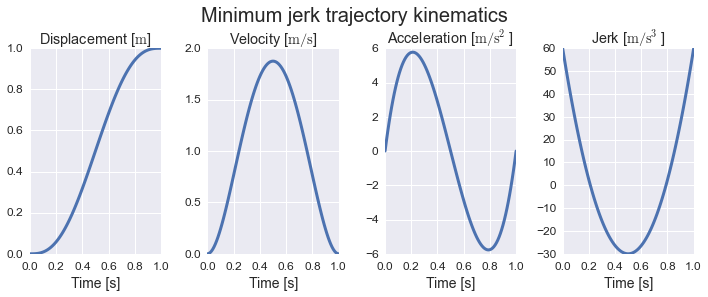

In [7]:
# substitute by the numerical values
x2  = x2.subs([(xi, 0), (xf, 1), (d, 1)])
#create functions for calculation of numerical values
xfu = lambdify(t, diff(x2, t, 0), 'numpy')
vfu = lambdify(t, diff(x2, t, 1), 'numpy')
afu = lambdify(t, diff(x2, t, 2), 'numpy')
jfu = lambdify(t, diff(x2, t, 3), 'numpy')
#plots using matplotlib
ts = np.arange(0, 1.01, .01)
font = {'weight':'normal', 'size':12}
plt.matplotlib.rc('font', **font)
fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharex=True, squeeze=True)
axs[0].plot(ts, xfu(ts), linewidth=3)
axs[0].set_title('Displacement [$\mathrm{m}$]')
axs[1].plot(ts, vfu(ts), linewidth=3)
axs[1].set_title('Velocity [$\mathrm{m/s}$]')
axs[2].plot(ts, afu(ts), linewidth=3)
axs[2].set_title('Acceleration [$\mathrm{m/s^2}$]')
axs[3].plot(ts, jfu(ts), linewidth=3)
axs[3].set_title('Jerk [$\mathrm{m/s^3}$]')

for axi in axs:
    axi.set_xlabel('Time [s]', fontsize=14)
    axi.grid(True)

fig.suptitle('Minimum jerk trajectory kinematics', fontsize=20, y=1.03)
fig.tight_layout()
plt.show()

At the minimum jerk trajectory, initial and final values of both velocity and acceleration are zero, but not for the jerk.  

Read more about the minimum jerk trajectory hypothesis in the [Shadmehr and Wise's book companion site](http://www.shadmehrlab.org/book/minimum_jerk/minimumjerk.htm) and in [Paul Gribble's website](http://www.gribblelab.org/compneuro/4_Computational_Motor_Control_Kinematics.html#sec-5-1).

## Problems

1. Calculate and plot the position, velocity, acceleration, and jerk trajectories for different movement speeds (for example, consider always a displacement of 1 m and movement durations of 0.5, 1, and 2 s).  
2. For the data in the previous item, calculate the ratio peak speed to average speed. Shadmehr and  Wise (2004) argue that psychophysical experiments show that reaching movements with the hand have this ratio equals to 1.75. Compare with the calculted values.

## References

- Flash T, Hogan N (1985) [The coordination of arm movements: an experimentally confirmed mathematical model](http://www.jneurosci.org/cgi/reprint/5/7/1688.pdf). Journal of Neuroscience, 5, 1688-1703.   
- Hogan N (1984) [An organizing principle for a class of voluntary movements](http://www.jneurosci.org/content/4/11/2745.full.pdf). Journal of Neuroscience, 4, 2745-2754.
- Shadmehr R, Wise S (2004) [The Computational Neurobiology of Reaching and Pointing: A Foundation for Motor Learning](http://www.shadmehrlab.org/book/). A Bradford Book. [Companion site](http://www.shadmehrlab.org/book/).
- Zatsiorsky VM (1998) [Kinematics of Human Motion](http://books.google.com.br/books/about/Kinematics_of_Human_Motion.html?id=Pql_xXdbrMcC&redir_esc=y). Champaign, Human Kinetics.